In [1]:
#importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy.optimize import curve_fit
from  scipy.stats import chisquare
from  scipy.stats import power_divergence
from matplotlib.ticker import MultipleLocator, AutoLocator
mlp.style.use("classic") #giving a specified style to a plot

/home/mher/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


                                             
Fit Statistics                               
Fitting Method       Curve Fit   method=lmfit
Data Points                 83               
variables                   25               
Chi-square             25.8636               
Reduced Chi-square     42.4909               
                                             
Variables                Value          Error
a1                     1.09142       0.308966
tmax1                  4.59821       0.428787
rise1                  5.29252        11460.4
decay1                 5.29153        11457.2
n1                     1.63302       0.884631
a2                     1.49081       0.150392
tmax2                   22.338       0.279993
rise2                  15.6753        4.47048
decay2                 2.35309       0.400111
n2                     3.10564       0.974055
a3                    0.842563       0.146318
tmax3                  33.9546       0.083106
rise3                  9.01272    

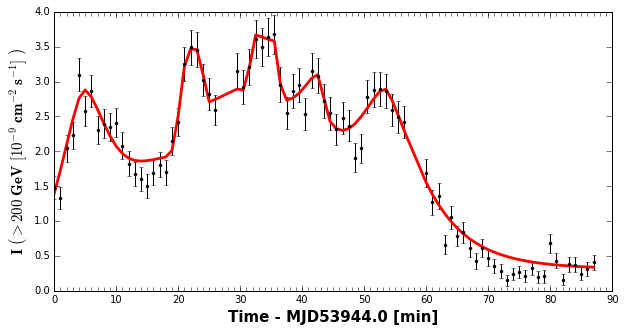

In [11]:
#reading data from a .txt file
MJD, flux, flux_err = np.loadtxt("/home/mher/Desktop/Final Results/data for PKS 2155-304.txt",unpack=True)

#changing data for adapting axis scales
flux = flux *10**9
flux_err = flux_err*10**9
MJD = (MJD - 53944.02568281) * 86400/60 #to return minutes, insted of MJDs

#definig a functions which will fit the data 

def fit(t,a1,tmax1,rise1,decay1,n1,a2,tmax2,rise2,decay2,n2,a3,tmax3,rise3,decay3,n3,a4,tmax4,rise4,
        decay4,n4,a5,tmax5,rise5,decay5,n5):
    
    return 0.3+a1*np.exp(-(abs(t-tmax1)/rise1)**n1)+a1*np.exp(-(abs(t-tmax1)/decay1)**n1)+a2*np.exp(-(abs(t-tmax2)/rise2)**n2)+a2*np.exp(-(abs(t-tmax2)/decay2)**n2)+a3*np.exp(-(abs(t-tmax3)/rise3)**n3)+a3*np.exp(-(abs(t-tmax3)/decay3)**n3)+a4*np.exp(-(abs(t-tmax4)/rise4)**n4)+a4*np.exp(-(abs(t-tmax4)/decay4)**n4)+a5*np.exp(-(abs(t-tmax5)/rise5)**n5)+a5*np.exp(-(abs(t-tmax5)/decay5)**n5)



#applaying curve fiting to our data, bounds are given from infinity to infity, for returning covariance. 

optimal_param,covariance = curve_fit(fit,MJD,flux,sigma = 1/flux_err**2,p0 = [1.2,5,1.2,4.2,1.07,2.1,23,6,1.2,
                                                                              1.43,3.1,35.5,6.3,1.3,1.59,2.0,41.5,1.2,
                                                                              4.6,2.01,1.5,52.5,2.3,16,2.44],
bounds=([-np.inf,1,-np.inf,-np.inf,-np.inf,-np.inf,20,-np.inf,-np.inf,-np.inf,-np.inf,23,-np.inf,-np.inf,-np.inf,-np.inf,
        40,-np.inf,-np.inf,-np.inf,-np.inf,50,-np.inf,-np.inf,-np.inf],[np.inf,7,np.inf,np.inf,np.inf,np.inf,25,np.inf,
        np.inf,np.inf,np.inf,36,np.inf,np.inf,np.inf,np.inf,43,np.inf,np.inf,np.inf,np.inf,54,np.inf,np.inf,np.inf]))

  
#compute chi-sqaures, and reduced chi sqaured, for detecting goodness of fit

yfunc_chi = fit(flux,*optimal_param)
chi_list = [(flux[i]-yfunc_chi[i])**2/flux_err[i]**2 for i in range(0,len(MJD))]
chi_sum = sum(chi_list) 
#chi square
chi_square = power_divergence(flux,yfunc_chi,ddof=82, lambda_='pearson')[0] #ddof is the numbers of data point minus 1

#reduced-chi square 
re_chi = chi_sum/(len(MJD)-1) #for getting reduced chi square we devide chi sum to freedom degree, which is #of data poins -1

#Creating DatFrame object to visualize fit report.
columns = ["Fitting Method","Data Points","variables","Chi-square","Reduced Chi-square"," ","Variables", "a1","tmax1","rise1", "decay1", "n1",'a2','tmax2','rise2','decay2','n2',
           'a3','tmax3','rise3','decay3','n3','a4','tmax4','rise4','decay4','n4','a5','tmax5',
           'rise5','decay5','n5']

#optimization is a dictionary with keys of fit report variable names, and values, of fit corresponind values
optimization ={
      "Fitting Method":[" Curve Fit"," method=lmfit"],
      "Data Points":[len(MJD)," "],
      "variables": [25," "],
      "Chi-square":[chi_square," "],
      "Reduced Chi-square": [re_chi, " "],
      " ": [" "," "],
      "Variables": ["Value","Error"],
      "a1" : [optimal_param[0], covariance[0,0]**0.5],
      "tmax1": [optimal_param[1],covariance[1,1]**0.5],
      "rise1": [optimal_param[2],covariance[2,2]**0.5],
      "decay1": [optimal_param[3],covariance[3,3]**0.5 ],
      "n1": [optimal_param[4],covariance[4,4]**0.5],
      'a2': [optimal_param[5],covariance[5,5]**0.5],
      'tmax2': [optimal_param[6],covariance[6,6]**0.5],
      'rise2': [optimal_param[7],covariance[7,7]**0.5],
      'decay2': [optimal_param[8],covariance[8,8]**0.5],
      'n2': [optimal_param[9],covariance[9,9]**0.5],
      'a3':[optimal_param[10],covariance[10,10]**0.5],
      'tmax3':[optimal_param[11],covariance[11,11]**0.5],
      'rise3': [optimal_param[12],covariance[12,12]**0.5],
      'decay3': [optimal_param[13],covariance[13,13]**0.5],
      'n3': [optimal_param[14],covariance[14,14]**0.5],
      'a4':[optimal_param[15],covariance[15,15]**0.5],
      'tmax4': [optimal_param[16],covariance[16,16]**0.5],
      'rise4':[optimal_param[17],covariance[17,17]**0.5],
      'decay4': [optimal_param[18],covariance[18,18]**0.5],
      'n4':[optimal_param[19],covariance[19,19]**0.5],
      'a5': [optimal_param[20],covariance[20,20]**0.5],
      'tmax5': [optimal_param[21],covariance[21,21]**0.5],
      'rise5':[optimal_param[22],covariance[22,22]**0.5],
      'decay5':[optimal_param[23],covariance[23,23]**0.5],
      'n5': [optimal_param[24],covariance[24,24]**0.5],
       }


df = pd.DataFrame(data = optimization, columns=columns, index=[" "," "]) #creating a dataframe
report = df.T #transposing it for better visualization
report.index.name = "Fit Statistics" 

print(report)

#plotting

fig, ax = plt.subplots(figsize = (10,5)) #configuring figure size
#creating error graph of our data 
plt.errorbar(MJD,flux, yerr =flux_err, fmt = ".-", ecolor="k", elinewidth=1.002,ls = ":", lw = 0, color= "k", capsize=1.98)
#add fitting plot
plt.plot(MJD,fit(MJD,*optimal_param),color ="r", linewidth = 2.8)


# configuring y axis
plt.ylim(0,4)
ytext = r'$ \mathbf {I\ \left(>200\ GeV\ [10^{-9}\ cm^{-2}\ s^{-1} ]\ \right)} $'
plt.ylabel(ytext, fontweight = "bold", fontsize = 15)

#configuring  x axis

xtext = "Time - MJD53944.0 [min]"
plt.xlabel(xtext, fontsize = 15, fontweight = "bold")

#configuring ticks

xminorlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(xminorlocator)
ax.tick_params(which = "major",length = 5.7 )
ax.tick_params(which = "minor", length = 3.9)

#saving and showing graph

#plt.savefig("/home/mher/Desktop/PKS2155-304, integral flux, fitting/Plots/Integral Flux PKS2155-304, curve_fit, best,better.pdf", dpi = 400)
plt.show()



